## Shopify Data Science Challenge Fall 2022


---
* **Name:** Yipeng Du
* **Email:** dypgnxdyspa@gmail.com

---

#### Question 1: Given some sample data, write a program to answer the following:
On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

#### a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

In [14]:
import csv
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")
data.head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


/Users/mduaiml/.conda/envs/pythonProject1/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='order_amount'>

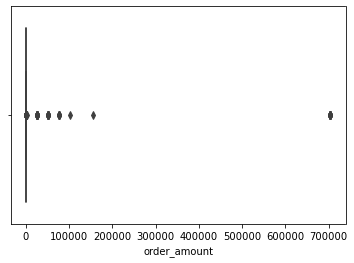

In [17]:
sn.boxplot(data.order_amount)


array([[<AxesSubplot:title={'center':'order_amount'}>]], dtype=object)

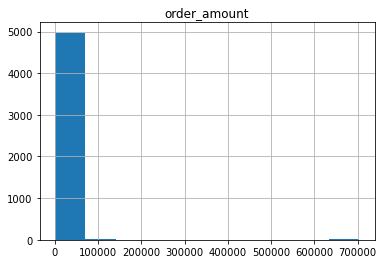

In [20]:
pd.DataFrame.hist(data=data, column='order_amount')

We see from the above box plot that there are many outliers that heavily skews the average price with exceedingly high price and very little amount of sales. Therefore, we say that, without eliminating the outliers, the more representative statistic for an average price is the median of the data. We can see from the follow result that it supports my assumption where the median of the data is far more reasonable.

In [22]:
data.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

#### b. What metric would you report for this dataset?

From the above discoveries, we say that we should use the median for this dataset (if we do not eliminate the outliers from the dataset).

#### c. What is its value?


In [23]:
print(f'The median of the shoe sales is {data["order_amount"].median()}')

The median of the shoe sales is 284.0


---

### Question 2

  For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

#### a. How many orders were shipped by Speedy Express in total?


SELECT COUNT(*) FROM Orders
JOIN Shippers ON Shippers.ShipperID = Orders.ShipperID
WHERE Shippers.ShipperName = 'Speedy Express';

From the joint table of Orders and Shippers, we count the number of orders where the ShipperID matches and the ShipperName is "Speedy Express". From running the above code, we obtain the result to be 54.

#### b. What is the last name of the employee with the most orders?

SELECT LastName, Count() as orders FROM Employees
JOIN Orders ON Employees.EmployeeID = Orders.EmployeeID
GROUP BY Employees.LastName
ORDER BY Count() DESC;

From the joint table of Orders and Employees, we group the columns by their last name to get the count and sort them in descending order. This allows us to obtain the answer to be Peacock with 40 orders as desired.

#### c. What product was ordered the most by customers in Germany?

SELECT Products.ProductName, Sum(OrderDetails.Quantity) as ordered FROM Orders
JOIN Customers ON Orders.CustomerID = Customers.CustomerID
JOIN OrderDetails ON Orders.OrderID = OrderDetails.OrderID
JOIN Products ON Products.ProductID = OrderDetails.ProductID
WHERE Customers.Country = 'Germany'
GROUP BY Products.ProductName
ORDER BY ordered DESC;

From the joint table of Orders, OrderDtails, Products, we group the columns by ProductName for the Country is Germany and sort them in descending order. This allows us to obtain the answer to be Boston Crab Meat for 160 orders as desired.